#### Load Librabries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder


# Data Processing and Transformation

## Loading and Cleaning the BLS data.

1. Load the Data 

In [2]:
# Load the data using pandas
bls_data=pd.read_excel("./Ressources/bls_data.xlsx")
# Preview the first few rows to check if the data is being read correctly
display(bls_data.head(3))

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,13.97,17.14,23.11,37.01,58.4,29050,35660,48060,76980,121470
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,26.23,37.66,56.19,81.29,111.36,54550,78330,116880,169090,231620
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,22.31,31.81,49.74,79.57,#,46400,66170,103460,165500,#


In [3]:
# check the columns names:
bls_data.columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'PCT_TOTAL', 'PCT_RPT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE',
       'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10',
       'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'],
      dtype='object')

2.  Clean the BLS Data

In [4]:
# Select the relevant columns from your DataFrame
relevant_columns = [
    'AREA_TITLE', 'NAICS_TITLE', 
    'OCC_CODE', 'OCC_TITLE', 'TOT_EMP', 'PRIM_STATE',
    'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN'
]
# Subset the DataFrame 
bls_df = bls_data[relevant_columns]
bls_df.head()

,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN
0,U.S.,Cross-industry,00-0000,All Occupations,151853870,US,31.48,65470,23.11,48060
1,U.S.,Cross-industry,11-0000,Management Occupations,10495770,US,66.23,137750,56.19,116880
2,U.S.,Cross-industry,11-1000,Top Executives,3751510,US,65.43,136100,49.74,103460
3,U.S.,Cross-industry,11-1010,Chief Executives,211230,US,124.47,258900,99.37,206680
4,U.S.,Cross-industry,11-1011,Chief Executives,211230,US,124.47,258900,99.37,206680


In [5]:
#check the dtypes of the df
bls_df.dtypes

AREA_TITLE     object
NAICS_TITLE    object
OCC_CODE       object
OCC_TITLE      object
TOT_EMP        object
PRIM_STATE     object
H_MEAN         object
A_MEAN         object
H_MEDIAN       object
A_MEDIAN       object
dtype: object

In [6]:
# Convert numeric columns to appropriate types (handle errors in conversion)
numeric_columns = ['TOT_EMP', 'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN']
# Convert specified columns to numeric, handling errors with 'coerce'
bls_df.loc[:,numeric_columns] = bls_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Preview the cleaned data
bls_df.head()


C:\Users\marwa\AppData\Local\Temp\ipykernel_17264\4206975348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bls_df.loc[:,numeric_columns] = bls_df[numeric_columns].apply(pd.to_numeric, errors='coerce')


,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN
0,U.S.,Cross-industry,00-0000,All Occupations,151853870.0,US,31.48,65470.0,23.11,48060.0
1,U.S.,Cross-industry,11-0000,Management Occupations,10495770.0,US,66.23,137750.0,56.19,116880.0
2,U.S.,Cross-industry,11-1000,Top Executives,3751510.0,US,65.43,136100.0,49.74,103460.0
3,U.S.,Cross-industry,11-1010,Chief Executives,211230.0,US,124.47,258900.0,99.37,206680.0
4,U.S.,Cross-industry,11-1011,Chief Executives,211230.0,US,124.47,258900.0,99.37,206680.0


In [7]:
#recheck the data type
bls_df.dtypes

AREA_TITLE     object
NAICS_TITLE    object
OCC_CODE       object
OCC_TITLE      object
TOT_EMP        object
PRIM_STATE     object
H_MEAN         object
A_MEAN         object
H_MEDIAN       object
A_MEDIAN       object
dtype: object

In [8]:
#  Ensure that AREA_TITLE, , NAICS_TITLE, and OCC_TITLE have consistent formatting 
#str.strip to Remove leading/trailing spaces and str.title to standardize case
bls_df.loc[:,'AREA_TITLE'] = bls_df['AREA_TITLE'].str.strip().str.title()#strip spaces and standardize text formatting 
bls_df.loc[:,'OCC_TITLE'] = bls_df['OCC_TITLE'].str.strip().str.title()
bls_df.loc[:,'NAICS_TITLE'] = bls_df['NAICS_TITLE'].str.strip()

In [9]:
# Remove hyphen and the invalid code from the OCC_CODE column
bls_df.loc[:,'OCC_CODE'] = bls_df['OCC_CODE'].str.replace('-', '', regex=False).replace('', np.nan).dropna()

In [10]:
# Get the unique values for each column in the DataFrame
unique_values = bls_df.apply(lambda x: x.unique())

# Display the unique values for each column
print(unique_values)

AREA_TITLE     [U.S., Alabama, Alaska, Arizona, Arkansas, Cal...
NAICS_TITLE    [Cross-industry, Cross-industry, Private Owner...
OCC_CODE       [000000, 110000, 111000, 111010, 111011, 11102...
OCC_TITLE      [All Occupations, Management Occupations, Top ...
TOT_EMP        [151853870.0, 10495770.0, 3751510.0, 211230.0,...
PRIM_STATE     [US, AL, AK, AZ, AR, CA, CO, CT, DE, DC, FL, G...
H_MEAN         [31.48, 66.23, 65.43, 124.47, 62.18, nan, 76.9...
A_MEAN         [65470.0, 137750.0, 136100.0, 258900.0, 129330...
H_MEDIAN       [23.11, 56.19, 49.74, 99.37, 48.69, nan, 67.23...
A_MEDIAN       [48060.0, 116880.0, 103460.0, 206680.0, 101280...
dtype: object


In [11]:
#check and count the missing values
missing_values=bls_df.isna().sum()
missing_values

AREA_TITLE         0
NAICS_TITLE        0
OCC_CODE           0
OCC_TITLE          0
TOT_EMP        11598
PRIM_STATE         0
H_MEAN         20964
A_MEAN          5352
H_MEDIAN       23059
A_MEDIAN        7474
dtype: int64

In [12]:
#drop all the missing values from  the data
bls_df=bls_df.dropna(how='any')
# check all the remove values
bls_df.shape
# bls_df.isna().sum()

(378880, 10)

In [13]:
bls_df['PRIM_STATE'].unique()

array(['US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'GU', 'PR', 'VI'],
      dtype=object)

In [14]:
# ensure to keep only the 50 us state while excluding the others 
unwanted_state=['GU','PR','VI','DC']
bls_clean=bls_df[~bls_df['PRIM_STATE'].isin(unwanted_state)]
bls_clean['PRIM_STATE'].unique()

array(['US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [15]:
# filter dataset to include only rows where the annual mean wage (A_MEAN) or hourly wage (H_MEAN) exceeds the equivalent of $100K per year.
bls_clean = bls_clean[(bls_clean['A_MEAN'] >= 100000) | (bls_clean['H_MEAN'] >= 48.08)]
bls_clean.tail(2)

,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN
412118,Southwest Louisiana Nonmetropolitan Area,Cross-industry,535031,Ship Engineers,90.0,LA,54.82,114020.0,52.71,109630.0
412119,Southwest Mississippi Nonmetropolitan Area,Cross-industry,535031,Ship Engineers,40.0,MS,55.86,116200.0,61.22,127330.0


 
### National Data Representation: 
We noticed that the national-level data is identified under the PRIM_STATE column as 'US', and the AREA_TITLE typically mentions 'U.S.' to indicate that the row represents data aggregated for the entire U.S. rather than a specific state.

* State-Level Data: All other rows represent state-specific data, where the PRIM_STATE column corresponds to the state abbreviation (like 'CA' for California, 'TX' for Texas, etc.).both national and state-level data for the flexibility of analysis. 

we can use national data for comparison while primarily focusing on state-specific data, which gives a fuller picture of the job market

In [16]:
# Create a new column 'LEVEL' to tag national data based on 'PRIM_STATE' and 'AREA_TITLE'
bls_clean.loc[:,'LEVEL'] = bls_clean.apply(
    lambda row: 'National' if row['PRIM_STATE'] == 'US' and 'U.S.' in row['AREA_TITLE'] else 'State', 
    axis=1
)

# Preview to check the tagging
bls_clean[['PRIM_STATE', 'AREA_TITLE', 'LEVEL']].head()


,PRIM_STATE,AREA_TITLE,LEVEL
1,US,U.S.,National
2,US,U.S.,National
3,US,U.S.,National
4,US,U.S.,National
5,US,U.S.,National


- Data Integrity: 
By tagging the national and state data explicitly, we ensure that the national-level data is treated separately, avoiding issues when conducting state-level analyses or visualizations.

In [17]:
# Isolate state-level data and national-level analysis for comparison.
bls_state_data = bls_clean[bls_clean['LEVEL'] == 'State']
National_data=bls_clean[bls_clean['LEVEL']=='National']
display(bls_state_data.head())
display(National_data.head())

,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,LEVEL
177552,Alabama,Cross-industry,110000,Management Occupations,105580.0,AL,56.21,116920.0,47.95,99740.0,State
177553,Alaska,Cross-industry,110000,Management Occupations,23750.0,AK,59.74,124260.0,52.25,108680.0,State
177554,Arizona,Cross-industry,110000,Management Occupations,232000.0,AZ,59.53,123820.0,49.31,102560.0,State
177556,California,Cross-industry,110000,Management Occupations,1308800.0,CA,77.1,160360.0,65.31,135840.0,State
177557,Colorado,Cross-industry,110000,Management Occupations,156700.0,CO,74.99,155970.0,65.95,137170.0,State


,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,LEVEL
1,U.S.,Cross-industry,110000,Management Occupations,10495770.0,US,66.23,137750.0,56.19,116880.0,National
2,U.S.,Cross-industry,111000,Top Executives,3751510.0,US,65.43,136100.0,49.74,103460.0,National
3,U.S.,Cross-industry,111010,Chief Executives,211230.0,US,124.47,258900.0,99.37,206680.0,National
4,U.S.,Cross-industry,111011,Chief Executives,211230.0,US,124.47,258900.0,99.37,206680.0,National
5,U.S.,Cross-industry,111020,General And Operations Managers,3507810.0,US,62.18,129330.0,48.69,101280.0,National


In [18]:
# check  the type after data split
bls_state_data.dtypes

AREA_TITLE     object
NAICS_TITLE    object
OCC_CODE       object
OCC_TITLE      object
TOT_EMP        object
PRIM_STATE     object
H_MEAN         object
A_MEAN         object
H_MEDIAN       object
A_MEDIAN       object
LEVEL          object
dtype: object

In [19]:
# Convert specified columns to numeric, handling errors with 'coerce'
bls_state_data[numeric_columns] =bls_state_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
# Preview the cleaned data
bls_state_data.head()

C:\Users\marwa\AppData\Local\Temp\ipykernel_17264\144381960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bls_state_data[numeric_columns] =bls_state_data[numeric_columns].apply(pd.to_numeric, errors='coerce')


,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,LEVEL
177552,Alabama,Cross-industry,110000,Management Occupations,105580.0,AL,56.21,116920.0,47.95,99740.0,State
177553,Alaska,Cross-industry,110000,Management Occupations,23750.0,AK,59.74,124260.0,52.25,108680.0,State
177554,Arizona,Cross-industry,110000,Management Occupations,232000.0,AZ,59.53,123820.0,49.31,102560.0,State
177556,California,Cross-industry,110000,Management Occupations,1308800.0,CA,77.10,160360.0,65.31,135840.0,State
177557,Colorado,Cross-industry,110000,Management Occupations,156700.0,CO,74.99,155970.0,65.95,137170.0,State


In [20]:
bls_state_data.dtypes

AREA_TITLE      object
NAICS_TITLE     object
OCC_CODE        object
OCC_TITLE       object
TOT_EMP        float64
PRIM_STATE      object
H_MEAN         float64
A_MEAN         float64
H_MEDIAN       float64
A_MEDIAN       float64
LEVEL           object
dtype: object

### Data Visualizations

In [21]:
# Summary statistics for numerical columns
bls_clean.describe()


,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,LEVEL
count,52073,52073,52073,52073,52073.0,52073,52073.00,52073.0,52073.00,52073.0,52073
unique,572,390,675,556,3990.0,51,5988.00,9930.0,6389.00,10576.0,2
top,U.S.,Cross-industry,113031,Financial Managers,40.0,US,48.44,100860.0,48.07,99990.0,National
freq,28577,23702,981,1394,2182.0,28577,54.00,31.0,86.00,73.0,28577


### Load educational Attainment data

In [22]:
#load data
census_data = pd.read_csv("./Ressources/census_data.csv",delimiter=',')
# check data
census_data.head()

,REGION,STATEICP,SEX,AGE,EDUC,EDUCD,GRADEATT,GRADEATTD,DEGFIELD,DEGFIELDD,...,QINCOTHE,QINCRETI,QINCSS,QINCTOT,QINCWAGE,QINCWELF,QPWSTAT2,US2022C_WAGP,US2022C_OCCP,US2022C_POWSP
0,32,41,1,41,6,63,0,0,0,0,...,0,0,0,0,0,0,0,24000,7330,1
1,32,41,1,21,7,71,0,0,0,0,...,0,0,0,0,0,0,0,29000,3870,1
2,32,41,2,19,7,71,6,60,0,0,...,4,4,4,4,4,4,4,4500,5400,1
3,32,41,2,51,8,81,0,0,0,0,...,0,0,0,0,0,0,4,30000,5840,1
4,32,41,1,20,6,65,6,60,0,0,...,4,4,4,4,4,4,4,17000,4020,1


In [23]:
census_data.columns

Index(['REGION', 'STATEICP', 'SEX', 'AGE', 'EDUC', 'EDUCD', 'GRADEATT',
       'GRADEATTD', 'DEGFIELD', 'DEGFIELDD', 'EMPSTAT', 'EMPSTATD', 'OCC',
       'OCCSOC', 'IND', 'INDNAICS', 'INCTOT', 'INCWAGE', 'OCCSCORE',
       'PWSTATE2', 'QAGE', 'QSEX', 'QEDUC', 'QGRADEAT', 'QDEGFIELD',
       'QEMPSTAT', 'QIND', 'QOCC', 'QINCBUS', 'QINCINVS', 'QINCOTHE',
       'QINCRETI', 'QINCSS', 'QINCTOT', 'QINCWAGE', 'QINCWELF', 'QPWSTAT2',
       'US2022C_WAGP', 'US2022C_OCCP', 'US2022C_POWSP'],
      dtype='object')

In [24]:
# filtre the data  to only keep the relevant columns
relevant_c = ['STATEICP' ,'OCCSOC', 'INCTOT', 'EDUCD','SEX', 'AGE']
census_data=census_data[relevant_c]
census_data.head()

,STATEICP,OCCSOC,INCTOT,EDUCD,SEX,AGE
0,41,49904X,28057,63,1,41
1,41,333050,33903,71,1,21
2,41,434171,5261,71,2,19
3,41,439041,35072,81,2,51
4,41,352010,19874,65,1,20


In [25]:
# census_data["OCCSOC"].unique()

In [26]:
# Remove any non-numeric characters and ensure all codes are exactly 6 digits by padding with leading zeros
census_data.loc[:, 'OCCSOC'] = census_data['OCCSOC'].str.extract('(\d+)', expand=False).str.zfill(6)

In [27]:
#Replace all occurrences of 1 with "Male" and 2 with "Female" in the SEX column.#
census_data.loc[:,'SEX'] = census_data['SEX'].astype(str).replace({'1': 'Male', '2': 'Female'})

C:\Users\marwa\AppData\Local\Temp\ipykernel_17264\1833119181.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Male' 'Male' 'Female' ... 'Female' 'Male' 'Female']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  census_data.loc[:,'SEX'] = census_data['SEX'].astype(str).replace({'1': 'Male', '2': 'Female'})


In [28]:
census_data.head()

,STATEICP,OCCSOC,INCTOT,EDUCD,SEX,AGE
0,41,049904,28057,63,Male,41
1,41,333050,33903,71,Male,21
2,41,434171,5261,71,Female,19
3,41,439041,35072,81,Female,51
4,41,352010,19874,65,Male,20


In [29]:
census_data['STATEICP'].nunique()

50

In [30]:
# Mapping of numeric state codes to their respective state abbreviations
census_df=census_data.copy()
state_code_to_abbr = {
    1: 'CT',2: 'ME', 3: 'MA',4: 'NH', 5: 'RI', 6: 'VT',11: 'DE', 12: 'NJ', 13: 'NY',14: 'PA', 21: 'IL',22: 'IN', 23: 'MI', 24: 'OH', 
    25: 'WI', 31: 'IA',32: 'KS',33: 'MN',34: 'MO', 35: 'NE',36: 'ND',37: 'SD',40: 'VA', 41: 'AL',42: 'AR', 43: 'FL',
    44: 'GA',45: 'LA',46: 'MS',47: 'NC',48: 'SC',49: 'TX', 51: 'KY', 52: 'MD', 53: 'OK', 54: 'TN', 56: 'WV', 61: 'AZ',               
    62: 'CO',63: 'ID', 64: 'MT', 65: 'NV', 66: 'NM', 67: 'UT', 68: 'WY', 71: 'CA', 72: 'OR', 73: 'WA', 81: 'AK', 82: 'HI'
}

# apply the map on the Data
census_df.loc[:,'PRIM_STATE']=census_df['STATEICP'].map(state_code_to_abbr)

In [31]:
# Dictionary to map STATEICP codes to state names (50 U.S. states only)
state_map = {
    1: 'Connecticut', 2: 'Maine',3: 'Massachusetts',4: 'New Hampshire',5: 'Rhode Island',6: 'Vermont',
    11: 'Delaware',12: 'New Jersey',13: 'New York',14: 'Pennsylvania',21: 'Illinois',22: 'Indiana',23: 'Michigan',24: 'Ohio',25: 'Wisconsin',
    31: 'Iowa',32: 'Kansas',33: 'Minnesota',34: 'Missouri',35: 'Nebraska',36: 'North Dakota',37: 'South Dakota',40: 'Virginia',41: 'Alabama',
    42: 'Arkansas',43: 'Florida',44: 'Georgia',45: 'Louisiana',46: 'Mississippi',47: 'North Carolina',48: 'South Carolina',49: 'Texas',
    51: 'Kentucky',52: 'Maryland',53: 'Oklahoma',54: 'Tennessee',56: 'West Virginia',61: 'Arizona',62: 'Colorado',63: 'Idaho',64: 'Montana',65: 'Nevada',
    66: 'New Mexico',67: 'Utah',68: 'Wyoming', 71: 'California',72: 'Oregon',73: 'Washington',81: 'Alaska', 82: 'Hawaii'
}
# apply the map on the Data
census_df.loc[:,'STATE_NAME']=census_df['STATEICP'].map(state_map)


In [32]:
# tx = census_df.loc[(census_df['STATE_NAME'] == 'Texas') & (census_df['PRIM_STATE'] == 'TX')]
# tx

In [33]:
# Education map for the provided codes
education_map = {
    63: "No schooling", 
    71: "Nursery to grade 4", 
    81: "Kindergarten", 
    65: "Grade 1 to 4", 
    101: "Grade 5 to 8", 
    40: "Grade 9", 
    64: "Grade 10", 
    50: "Grade 11", 
    30: "Grade 12, no diploma", 
    17: "High school graduate", 
    61: "Some college", 
    16: "1 year of college", 
    114: "Associate's degree", 
    116: "Bachelor's degree", 
    115: "Master's degree", 
    25: "Professional degree", 
    26: "Doctoral degree", 
    22: "Missing"
}

# Add missing education code (if known, or add as "Unknown")
# education_map[23] = "Some High School"  # Example mapping for code 23

# Apply the mapping again
census_df['EDUCATION_LABEL'] = census_df['EDUCD'].map(education_map)

In [34]:
#
census_df.head()

,STATEICP,OCCSOC,INCTOT,EDUCD,SEX,AGE,PRIM_STATE,STATE_NAME,EDUCATION_LABEL
0,41,049904,28057,63,Male,41,AL,Alabama,No schooling
1,41,333050,33903,71,Male,21,AL,Alabama,Nursery to grade 4
2,41,434171,5261,71,Female,19,AL,Alabama,Nursery to grade 4
3,41,439041,35072,81,Female,51,AL,Alabama,Kindergarten
4,41,352010,19874,65,Male,20,AL,Alabama,Grade 1 to 4


In [35]:
# check missing  values
census_df.isna().sum()

STATEICP               0
OCCSOC                 0
INCTOT                 0
EDUCD                  0
SEX                    0
AGE                    0
PRIM_STATE             0
STATE_NAME             0
EDUCATION_LABEL    41220
dtype: int64

In [36]:
#Drop missing valeus
census_df=census_df.dropna(how='any')

In [37]:
# Filter for individuals earning $100K or more
census_df = census_df[census_df['INCTOT'] >= 100000]

In [38]:
# CENSUS_DF.head()
display(census_df.tail())

,STATEICP,OCCSOC,INCTOT,EDUCD,SEX,AGE,PRIM_STATE,STATE_NAME,EDUCATION_LABEL
7022531,68,291123,101000,116,Female,41,WY,Wyoming,Bachelor's degree
7022534,68,001191,180000,114,Male,62,WY,Wyoming,Associate's degree
7022538,68,002310,434300,115,Male,62,WY,Wyoming,Master's degree
7022545,68,419020,272000,81,Female,47,WY,Wyoming,Kindergarten
7022551,68,492020,162000,63,Male,66,WY,Wyoming,No schooling


In [39]:
census_df.dtypes

STATEICP            int64
OCCSOC             object
INCTOT              int64
EDUCD               int64
SEX                object
AGE                 int64
PRIM_STATE         object
STATE_NAME         object
EDUCATION_LABEL    object
dtype: object

In [40]:
# rename the occupation code
census_df=census_df.rename(columns={'OCCSOC':'OCC_CODE'})

In [41]:
#create a combined data contains all the columns but only for the rows where there is a match on both PRIM_STATE and OCC_CODE.
merged_df=bls_state_data.merge(census_df,on=['PRIM_STATE','OCC_CODE'],how='inner')

In [42]:
bls_state_data.dtypes

AREA_TITLE      object
NAICS_TITLE     object
OCC_CODE        object
OCC_TITLE       object
TOT_EMP        float64
PRIM_STATE      object
H_MEAN         float64
A_MEAN         float64
H_MEDIAN       float64
A_MEDIAN       float64
LEVEL           object
dtype: object

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438150 entries, 0 to 5438149
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   AREA_TITLE       object 
 1   NAICS_TITLE      object 
 2   OCC_CODE         object 
 3   OCC_TITLE        object 
 4   TOT_EMP          float64
 5   PRIM_STATE       object 
 6   H_MEAN           float64
 7   A_MEAN           float64
 8   H_MEDIAN         float64
 9   A_MEDIAN         float64
 10  LEVEL            object 
 11  STATEICP         int64  
 12  INCTOT           int64  
 13  EDUCD            int64  
 14  SEX              object 
 15  AGE              int64  
 16  STATE_NAME       object 
 17  EDUCATION_LABEL  object 
dtypes: float64(5), int64(4), object(9)
memory usage: 746.8+ MB


### Loading Shapefile to Create a Map of US State

In [44]:
# Replace this with the path to your downloaded shapefile
shapefile_path = './us_state/us_state.shp'
# Load the shapefile into a GeoDataFrame
us_states = gpd.read_file(shapefile_path)

In [45]:
# Check the first few rows of the data to confirm it loaded correctly
us_states.head(3)

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266513826,488918898,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138965379385,45968913048,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778206717,6216848695,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


2. Merging Geospatial Data with Employment Data

In [46]:
# The merge is performed based on the state postal abbreviations: 'STUSPS' in us_states and 'PRIM_STATE' in merged_df.
merged = us_states.set_index('STUSPS').join(merged_df.set_index('PRIM_STATE'), rsuffix='_merged')# 'rsuffix' is used to avoid 
#column name conflicts during the merge.

In [47]:
#check the null value after merge
merged.isna().sum()

REGION             0
DIVISION           0
STATEFP            0
STATENS            0
GEOID              0
GEOIDFQ            0
NAME               0
LSAD               0
MTFCC              0
FUNCSTAT           0
ALAND              0
AWATER             0
INTPTLAT           0
INTPTLON           0
geometry           0
AREA_TITLE         6
NAICS_TITLE        6
OCC_CODE           6
OCC_TITLE          6
TOT_EMP            6
H_MEAN             6
A_MEAN             6
H_MEDIAN           6
A_MEDIAN           6
LEVEL              6
STATEICP           6
INCTOT             6
EDUCD              6
SEX                6
AGE                6
STATE_NAME         6
EDUCATION_LABEL    6
dtype: int64

In [48]:
#handel the missing  values
merged=merged.dropna(how='any')

In [49]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5438150 entries, WV to AZ
Data columns (total 32 columns):
 #   Column           Dtype   
---  ------           -----   
 0   REGION           object  
 1   DIVISION         object  
 2   STATEFP          object  
 3   STATENS          object  
 4   GEOID            object  
 5   GEOIDFQ          object  
 6   NAME             object  
 7   LSAD             object  
 8   MTFCC            object  
 9   FUNCSTAT         object  
 10  ALAND            int64   
 11  AWATER           int64   
 12  INTPTLAT         object  
 13  INTPTLON         object  
 14  geometry         geometry
 15  AREA_TITLE       object  
 16  NAICS_TITLE      object  
 17  OCC_CODE         object  
 18  OCC_TITLE        object  
 19  TOT_EMP          float64 
 20  H_MEAN           float64 
 21  A_MEAN           float64 
 22  H_MEDIAN         float64 
 23  A_MEDIAN         float64 
 24  LEVEL            object  
 25  STATEICP         float64 
 26  INCTOT         

3. Calculating and Mapping Mean Annual Income by State

In [50]:
A_income_state = (merged_df.groupby(['STATE_NAME'])['A_MEAN'].mean().reset_index()).round(2)
# we will have 50 rows of data and tehre will be 1 geometry for each state and we can plot the mean income by state on  a map using geopandas 
# The resulting data can be combined with the state's geometry to plot the mean income by state using GeoPandas.

In [51]:
A_income_state.head()

,STATE_NAME,A_MEAN
0,Alabama,122945.59
1,Alaska,124135.50
2,Arizona,124482.34
3,Arkansas,118211.49
4,California,137616.80


In [52]:
# Merging Annual Income Data with US State Geometries for Mapping
geo_df=A_income_state.merge(us_states, left_on = 'STATE_NAME', right_on='NAME') 
# This merges the calculated mean annual income data (A_income_state) with the shapefile data (us_states) based on the state name.
# 'left_on' refers to the 'STATE_NAME' column in the A_income_state DataFrame, and 'right_on' refers to the 'NAME' column in the us_states GeoDataFrame.
# This results in a new GeoDataFrame (geo_df) that includes both the mean annual income data and the corresponding geometries (state shapes).


In [53]:
# We then convert the merged DataFrame into a GeoDataFrame by setting the 'geometry' column to hold the spatial information.
geo_df=gpd.GeoDataFrame(geo_df,geometry=geo_df.geometry)


In [54]:
def StatesPlot(df, income_column, cmap='viridis', label_color='black', label_size=6,title='United States Map',filename='us_map.png'):
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=300)
    ax.set_axis_off()  # Turn off the axis to focus on the map

    # Plot the state geometries using the income column
    df.plot(income_column, ax=ax, alpha=0.7, cmap=cmap, legend=False, linewidth=0.5)

    # Add the color bar representing income
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=df[income_column].min(), vmax=df[income_column].max()))
    sm.set_array([])  # Empty array to avoid issues with ScalarMappable
    fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, aspect=10)
    # Add the title
    plt.title(title, fontsize=16)

    # Add state names (labels) to the map
    for idx, row in df.iterrows():
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, row['NAME'], fontsize=label_size, ha='center', color=label_color)
    
    # Save the figure as a PNG file for the report
    plt.savefig(filename, bbox_inches='tight', dpi=300)

    # Show the plot
    plt.show()

<Axes: >

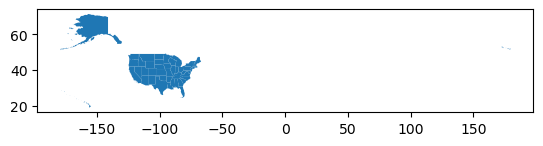

In [55]:
geo_df.plot()

In [56]:
test=geo_df.loc[~geo_df['STATE_NAME'].isin(['Alaska','Hawaii'])]

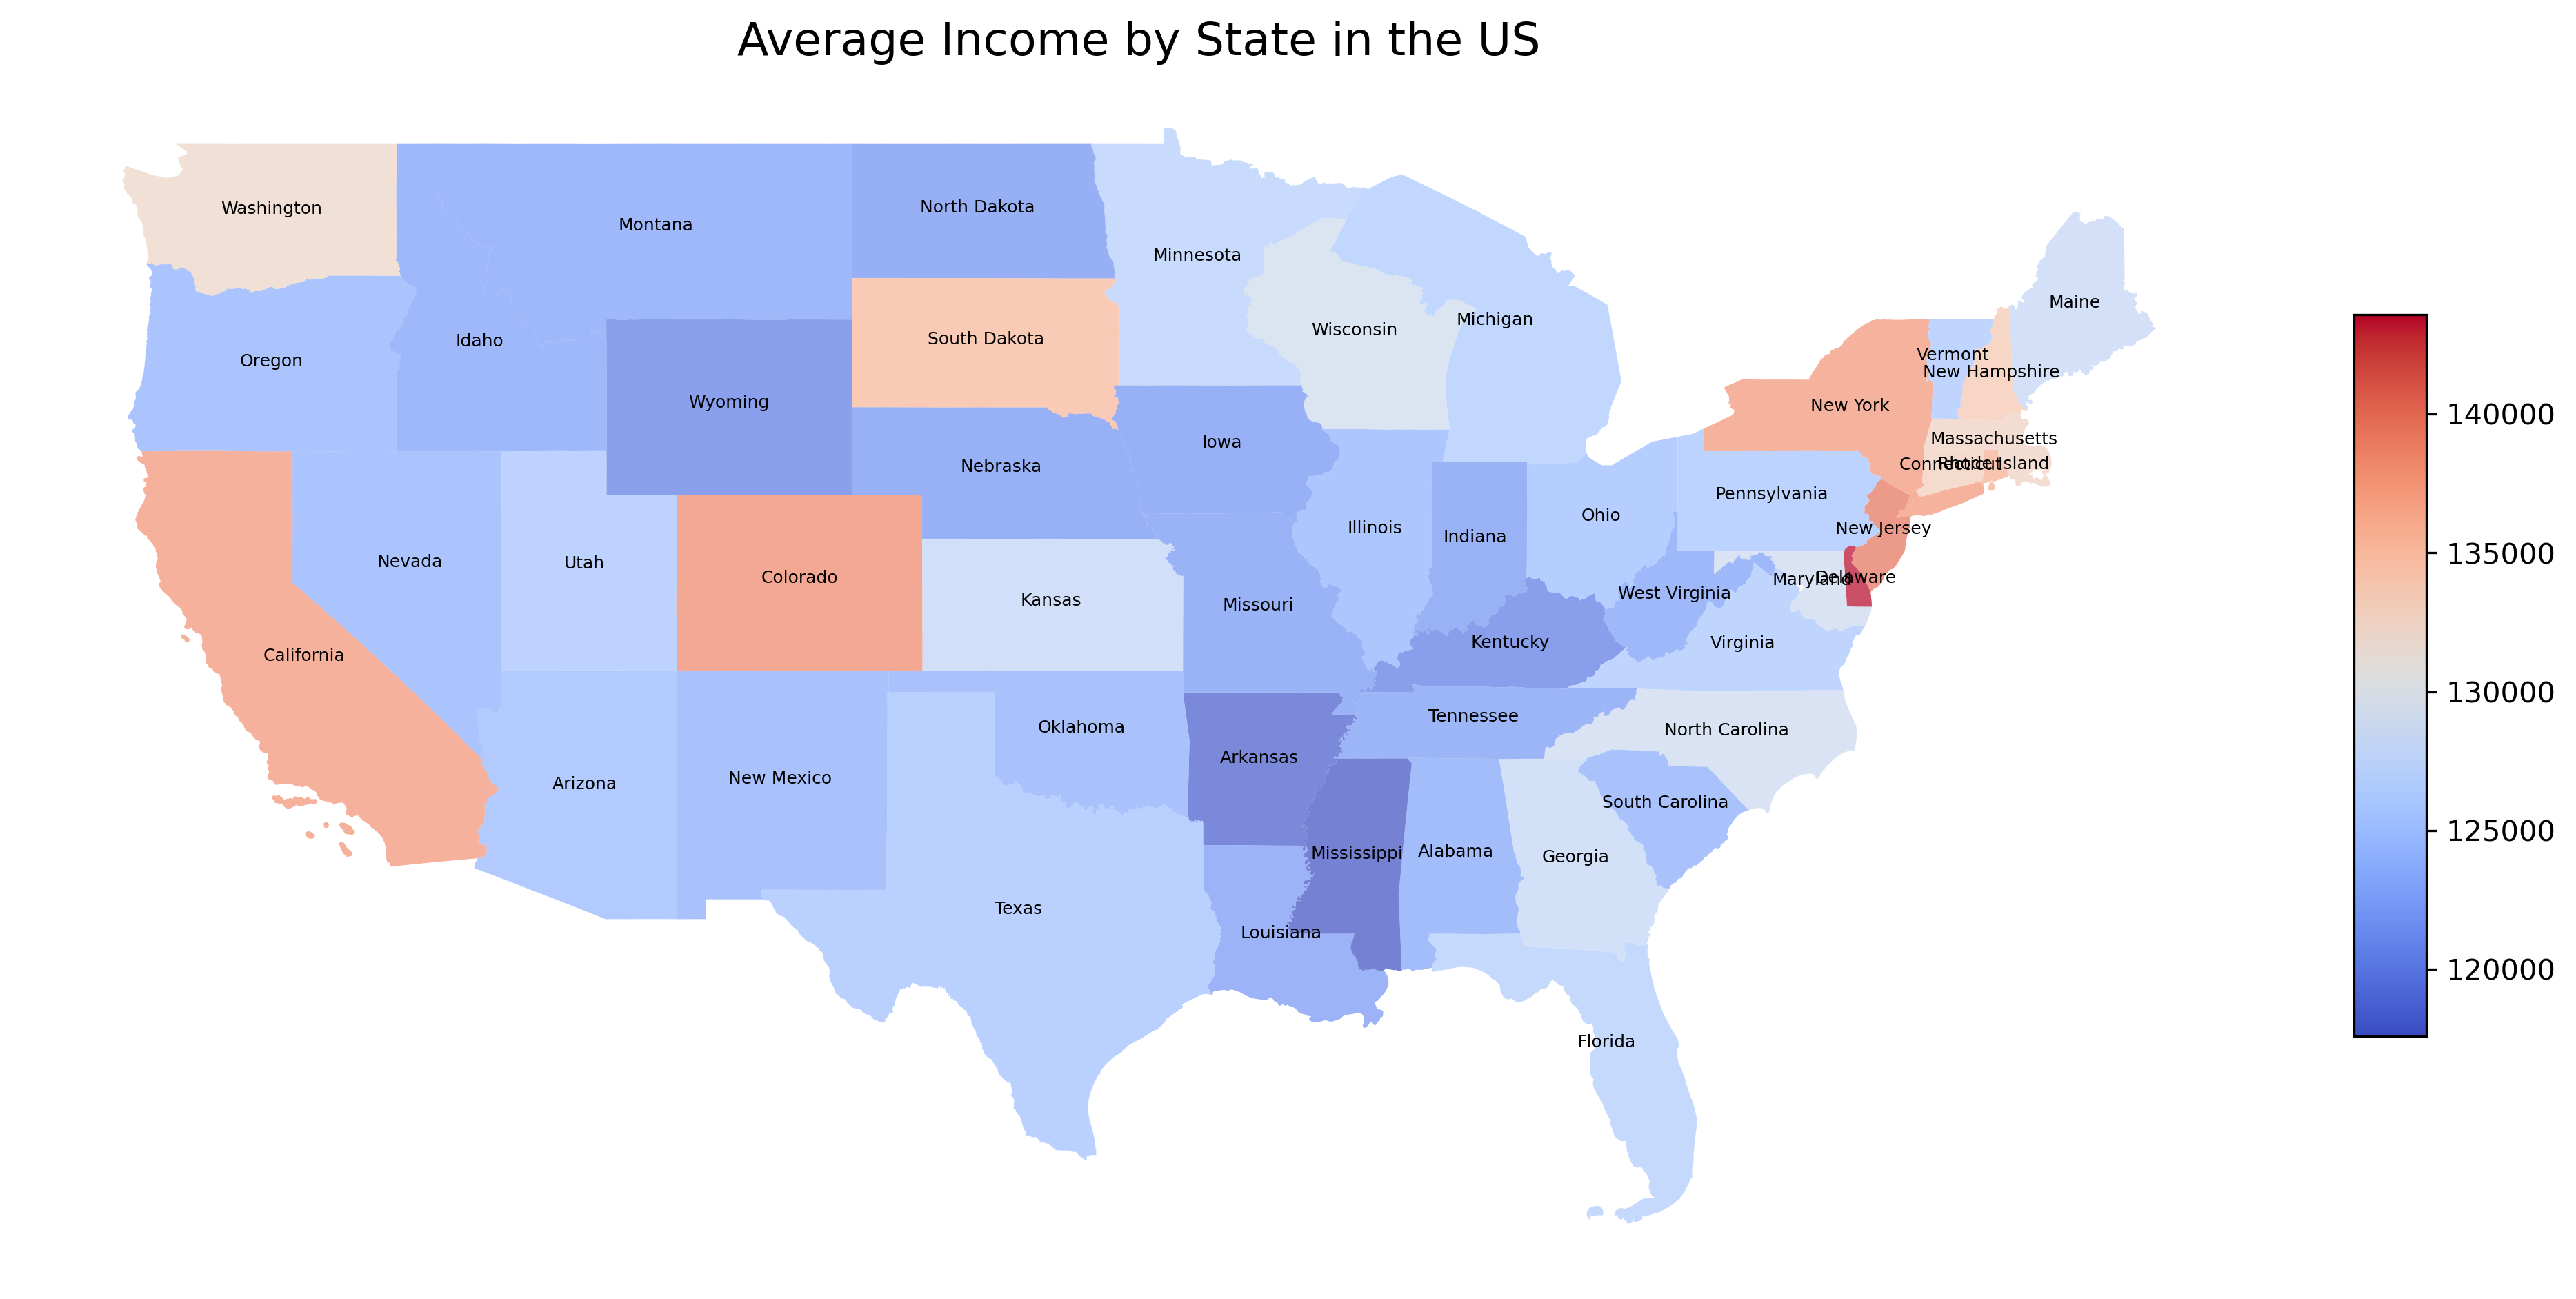

In [89]:
# Usage example (assuming `geo_df` contains the data with mean income column)
StatesPlot(test, income_column='A_MEAN', cmap='coolwarm', label_color='Black', label_size=6, 
title='Average Income by State in the US', filename='us_average_income_map.png')

In [58]:
merged_df.columns

Index(['AREA_TITLE', 'NAICS_TITLE', 'OCC_CODE', 'OCC_TITLE', 'TOT_EMP',
       'PRIM_STATE', 'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN', 'LEVEL',
       'STATEICP', 'INCTOT', 'EDUCD', 'SEX', 'AGE', 'STATE_NAME',
       'EDUCATION_LABEL'],
      dtype='object')

### Filter the Data Based on Income and Education Level

In [59]:
# Step 1: Grouping data by State and Education level
def group_by_state_and_education(df, income_column='A_MEAN', education_column='EDUCATION_LABEL'):
    # Group by state and education label, calculate the mean income
    grouped = df.groupby(['STATE_NAME', education_column])[income_column].mean().reset_index()
    
    # For each state, select the education level with the highest mean income
    highest_income_by_state = grouped.loc[grouped.groupby('STATE_NAME')[income_column].idxmax()].reset_index(drop=True)
    
    # Round the income values for better readability
    return highest_income_by_state.round(2)


In [60]:
# call the function to create the data 
grouped_education_data = group_by_state_and_education(merged_df, income_column='A_MEAN', education_column='EDUCATION_LABEL')

# Display the first few rows to verify the result
grouped_education_data.head()


,STATE_NAME,EDUCATION_LABEL,A_MEAN
0,Alabama,Doctoral degree,129929.71
1,Alaska,"Grade 12, no diploma",140587.50
2,Arizona,Master's degree,133734.15
3,Arkansas,Bachelor's degree,127738.78
4,California,Master's degree,142233.86


Step 2: Merge Grouped Data with Geographic Data

In [61]:
# Step 2: Merge the grouped data with the already available geographic data (us_states)
def merge_education_with_us_states(grouped_df, us_states_df):
    
    merged_geo = us_states_df.set_index('NAME').join(grouped_df.set_index('STATE_NAME'))

    # Convert to GeoDataFrame for plotting (if not already a GeoDataFrame)
    geo_df_Ed = gpd.GeoDataFrame(merged_geo, geometry=merged_geo.geometry)
    
    return geo_df_Ed


In [62]:
# create the merged data with geo_data
geo_education_df = merge_education_with_us_states(grouped_education_data, us_states)

In [63]:
# Display to verify the merge
geo_education_df.columns

Index(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'GEOIDFQ',
       'STUSPS', 'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'geometry', 'EDUCATION_LABEL', 'A_MEAN'],
      dtype='object')

In [ ]:

# def plot_education_by_state(geo_education_df, column_to_plot, cmap='coolwarm'):#column_to_plot
#     """

#     Plot a map of the U.S. showing the data for high-paid people by state and education level.
    
#     Parameters:
#     - geo_education_df: GeoDataFrame containing the merged data of states and education levels
#     - column_to_plot: The column in the dataframe to use for color-coding (e.g., A_MEAN or EDUCATION_LABEL)
#     - cmap: The color map to use for plotting (default is 'coolwarm')
#     """
    
#     fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
    
#     # Check if the column is numerical or categorical
#     if np.issubdtype(geo_education_df[column_to_plot].dtype, np.number):
#         # Numerical data: use continuous colormap
#         geo_education_df.plot(column=column_to_plot, cmap=cmap, linewidth=0.8, ax=ax[0], edgecolor='0.8')
        
#         # Create a divider for the colorbar
#         divider = make_axes_locatable(ax)
#         cax = divider.append_axes("bottom", size="5%", pad=0.1)
        
#         # Add colorbar (legend)
#         sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=geo_education_df[column_to_plot].min(), vmax=geo_education_df[column_to_plot].max()))
#         sm._A = []  # Empty array for the ScalarMappable
#         cbar = ax[1].colorbar(sm, cax=cax)
#         cbar.set_label(column_to_plot, fontsize=12)
#     else:
#         # Categorical data: use a discrete colormap
#         geo_education_df.plot(column=column_to_plot, cmap=cmap, linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
    
#     # Annotate each state with its abbreviation
#     for idx, row in geo_education_df.iterrows():
#         # Add state abbreviation (STUSPS) on the plot for each state
#         ax[1].text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['STUSPS'], fontsize=9, ha='center', va='center', color='black')

        
#     # Add title and format the plot
#     plt.title(f'United States Map: {column_to_plot}', fontsize=16)
#     ax[0].set_axis_off()
    
#     # # Adjust limits to fit the U.S. map properly
#     # ax.set_xlim([100, -60])  # Adjust based on map projection and region
#     # ax.set_ylim([20, 50])
    
#     # Save the plot to a file (e.g., for your report)
#     plt.savefig(f'education_by_state_{column_to_plot}.png', dpi=300)
#     plt.show()
 

In [65]:
test1=geo_education_df.loc[~geo_education_df['STUSPS'].isin(['AK','HI'])]

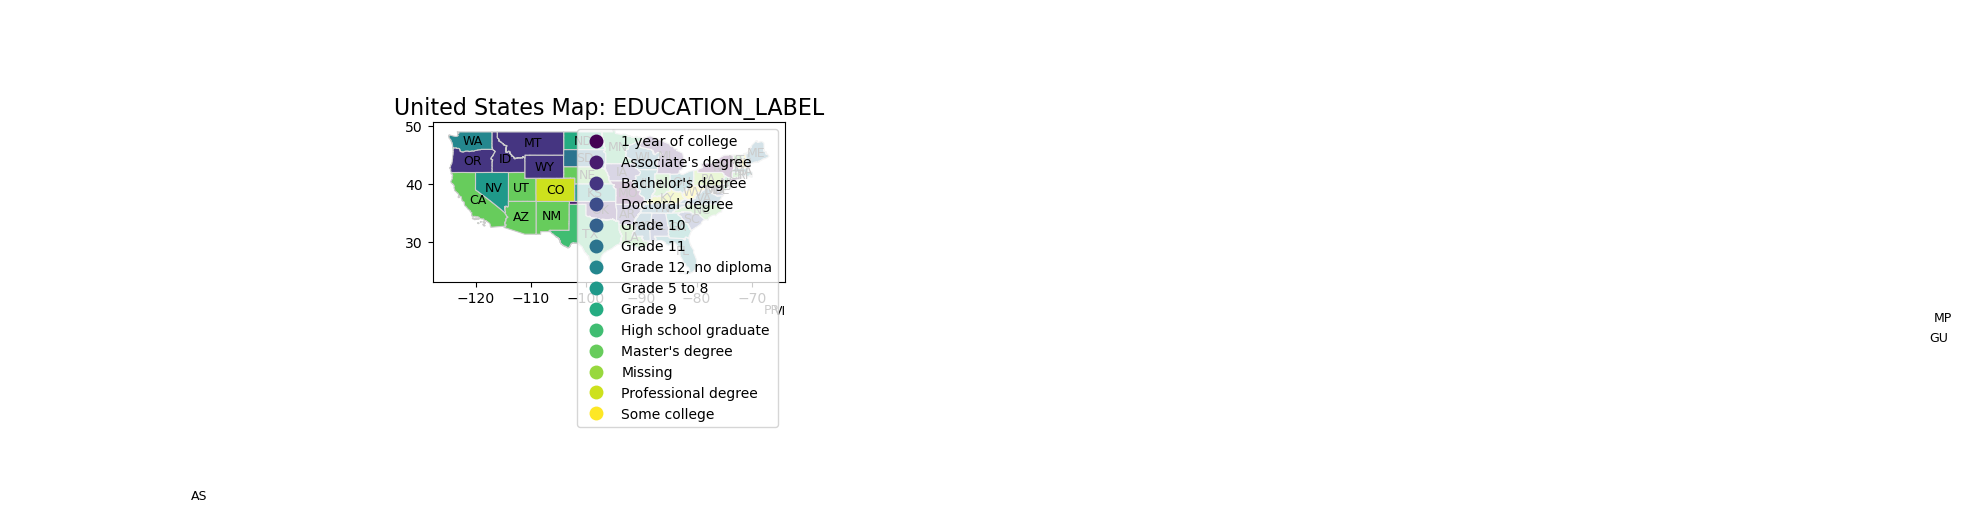

In [107]:
# Plot the education level of high-paid people by state
plot_education_by_state(test1, 'EDUCATION_LABEL', cmap='viridis')


## Questions and Visualizations


1. What is the distribution of high-paid individuals across different states?

- Plot 1: Bar plot showing the number of high-paid individuals by state.


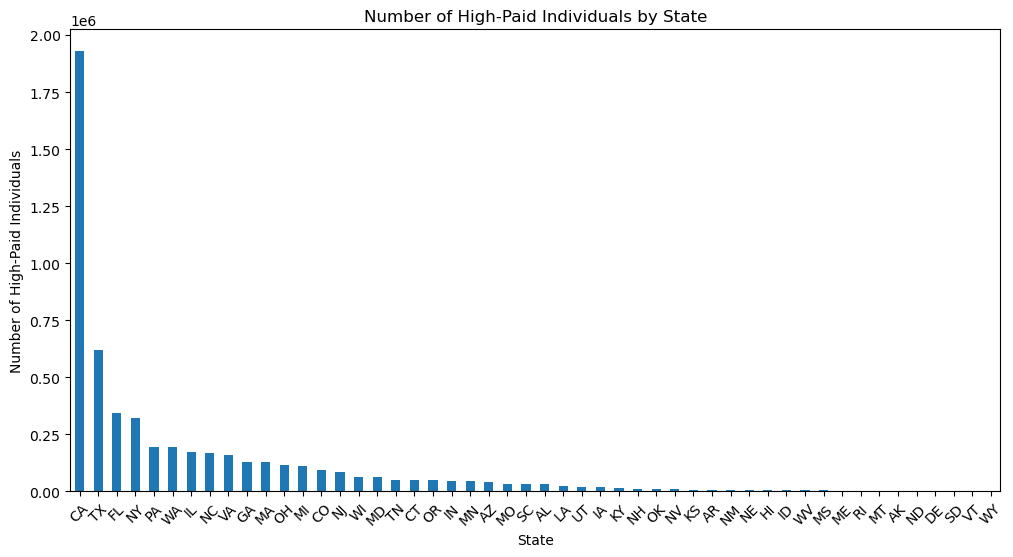

In [67]:
# 1. Distribution of high-paid individuals across different states
# Plot 1: Bar plot
plt.figure(figsize=(12, 6))
merged_df['PRIM_STATE'].value_counts().plot(kind='bar')
plt.title('Number of High-Paid Individuals by State')
plt.xlabel('State')
plt.ylabel('Number of High-Paid Individuals')
plt.xticks(rotation=45)
plt.show()

- Plot 2: Pie chart showing the percentage of high-paid individuals by state.

In [68]:
#Group states with less than a certain threshold into "Other"
threshold = 0.05  # 5% threshold
state_counts = merged_df['PRIM_STATE'].value_counts()

# Calculate the percentage of each state
state_percentages = state_counts / state_counts.sum()

# Create a new Series for states above the threshold
filtered_state_counts = state_counts[state_percentages >= threshold]

# Add "Other" category for states below the threshold
other_count = state_counts[state_percentages < threshold].sum()
if other_count > 0:
    filtered_state_counts['Other'] = other_count

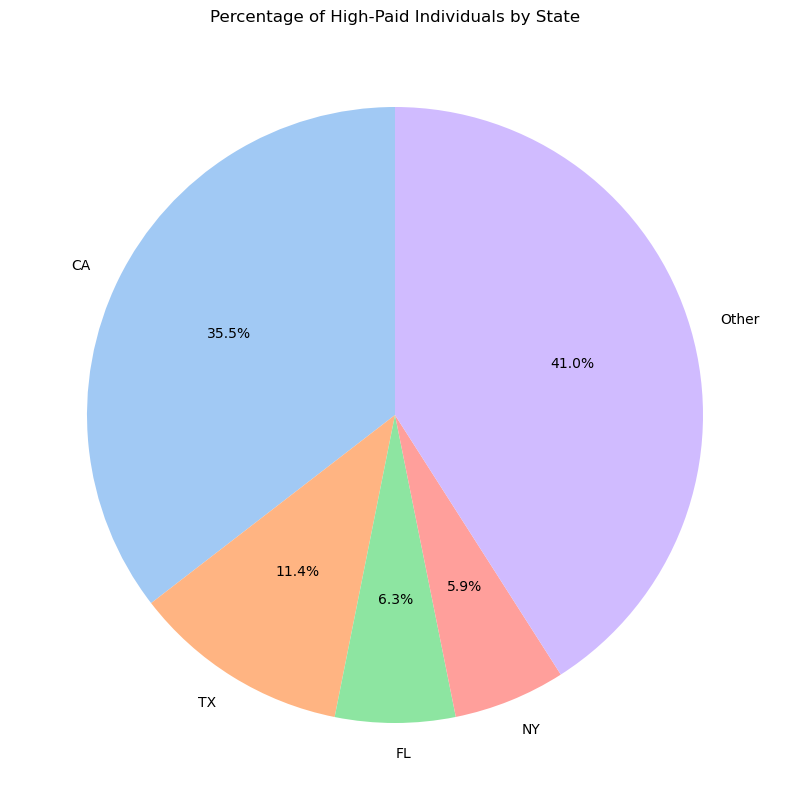

In [69]:
# Plot the pie chart
plt.figure(figsize=(10, 10))
filtered_state_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Percentage of High-Paid Individuals by State')
plt.ylabel('')  # Hide the y-label
plt.show()

2. What are the most common occupations among high-paid individuals?

- Plot 1: Bar plot showing the top occupations for high-paid individuals.


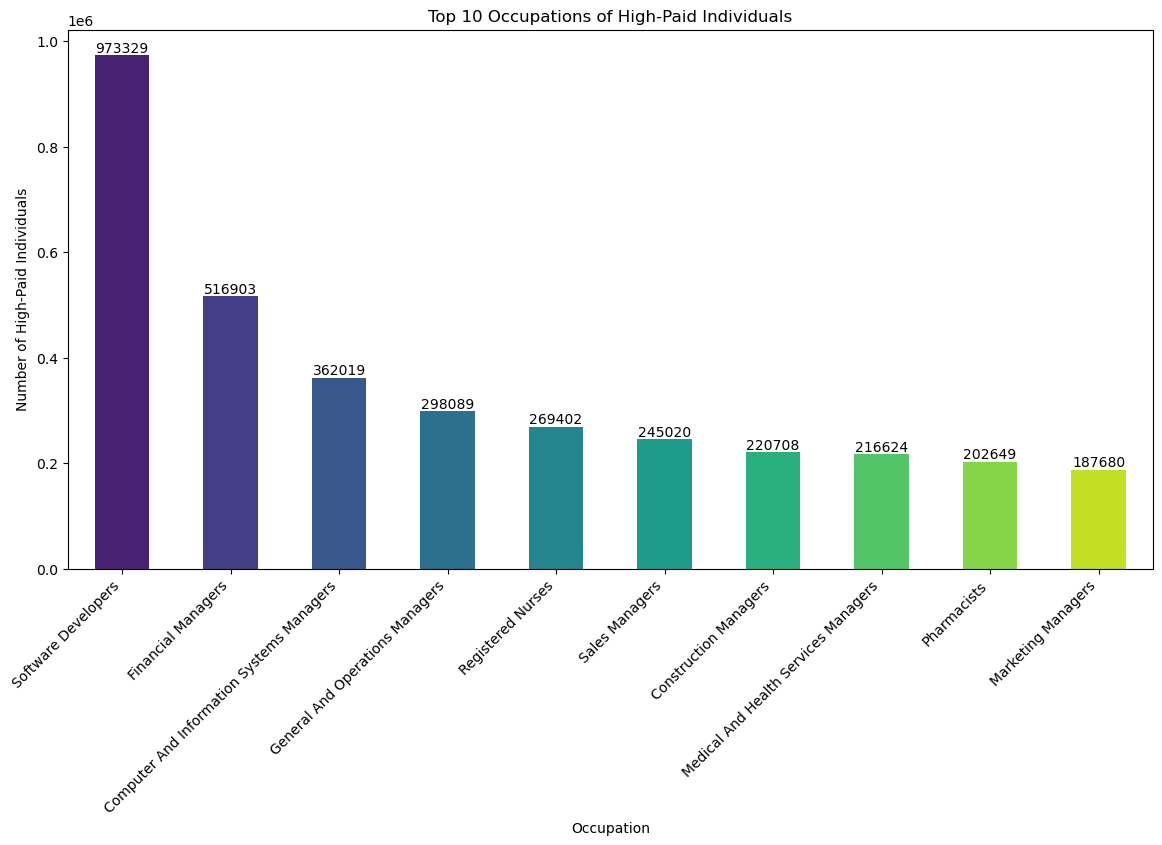

In [70]:
# Plot 1: Bar plot with a color palette
plt.figure(figsize=(14, 7))
top_occupations = merged_df['OCC_TITLE'].value_counts().head(10)
colors = sns.color_palette("viridis", len(top_occupations))  # Use a color palette

top_occupations.plot(kind='bar', color=colors)
plt.title('Top 10 Occupations of High-Paid Individuals')
plt.xlabel('Occupation')
plt.ylabel('Number of High-Paid Individuals')
plt.xticks(rotation=45, ha='right')

# Add text labels on top of the bars
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

plt.show()

- **Plot 2**: Horizontal bar plot for better readability of occupation names.


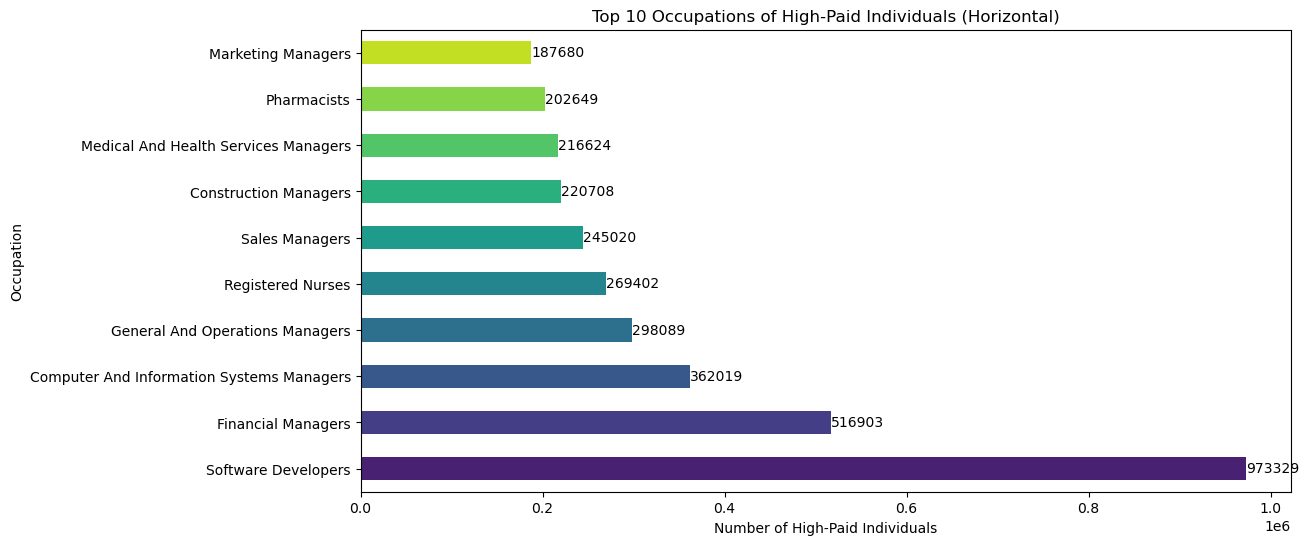

In [71]:
# Plot 2: Horizontal bar plot with a color palette
plt.figure(figsize=(12, 6))
top_occupations = merged_df['OCC_TITLE'].value_counts().head(10)

# Use a color palette
colors = sns.color_palette("viridis", len(top_occupations))  # Choose a color palette

top_occupations.plot(kind='barh', color=colors)
plt.title('Top 10 Occupations of High-Paid Individuals (Horizontal)')
plt.xlabel('Number of High-Paid Individuals')
plt.ylabel('Occupation')

# Add text labels on the bars
for index, value in enumerate(top_occupations):
    plt.text(value, index, str(value), va='center')  # Add text labels

plt.show()


3. What is the relationship between education level and the number of high-paid individuals?

- **Plot 1:** Bar plot showing the number of high-paid individuals by education level.


In [95]:
merged_df['EDUCATION_LABEL'].value_counts()

EDUCATION_LABEL
Grade 5 to 8            2445096
Associate's degree      1487183
Nursery to grade 4       347486
Kindergarten             284168
Bachelor's degree        258578
Master's degree          239844
No schooling             180331
Grade 1 to 4             134291
Grade 10                  33598
Some college              11515
Grade 11                   4975
Grade 9                    4518
Grade 12, no diploma       2435
Doctoral degree            2241
Professional degree         630
Missing                     516
High school graduate        402
1 year of college           343
Name: count, dtype: int64

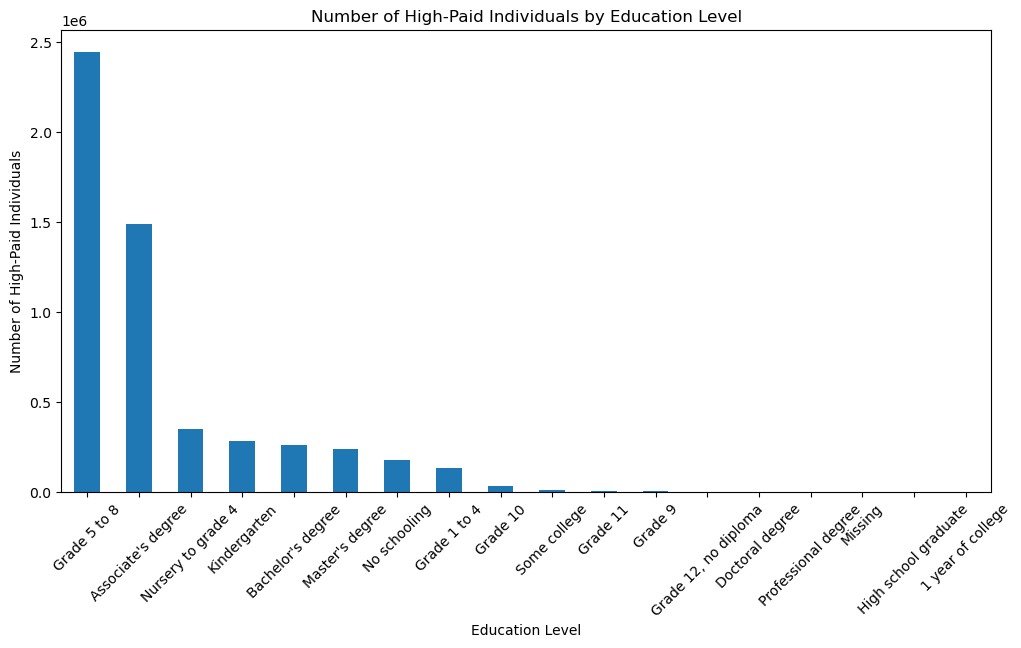

In [72]:
# 3. Relationship between education level and high-paid individuals
# Plot 1: Bar plot
plt.figure(figsize=(12, 6))
merged_df['EDUCATION_LABEL'].value_counts().plot(kind='bar')
plt.title('Number of High-Paid Individuals by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of High-Paid Individuals')
plt.xticks(rotation=45)
plt.show()


- **Plot 2:** Box plot showing the distribution of salaries by education level.


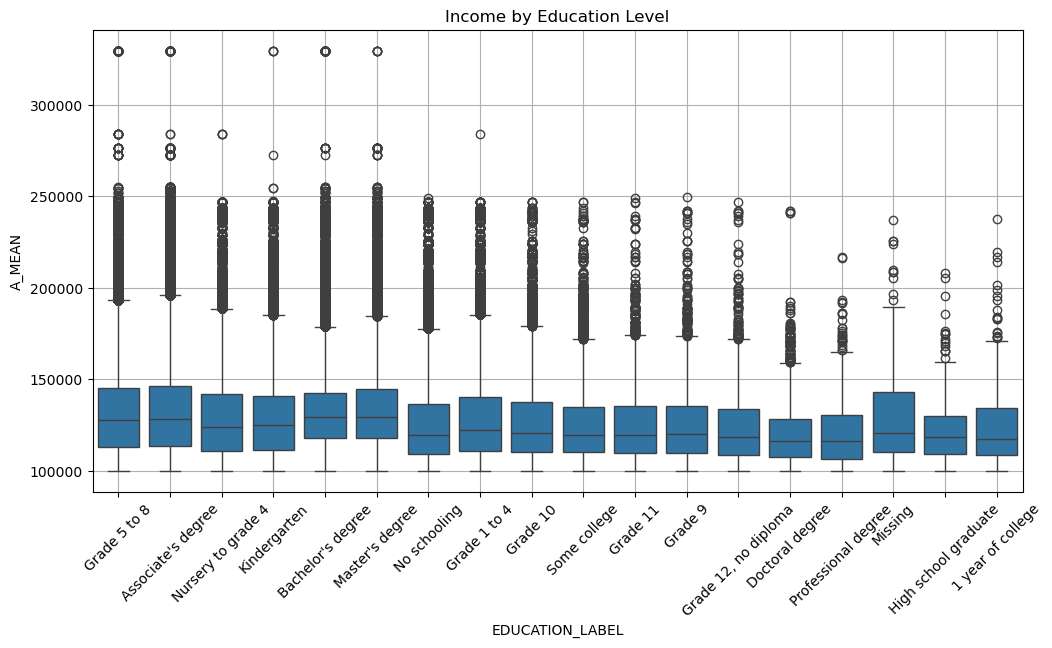

In [73]:
# Plot 2: Box plot
# Define a custom order for education levels if needed
education_order = merged_df['EDUCATION_LABEL'].value_counts().index.tolist()

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='EDUCATION_LABEL', y='A_MEAN', data=merged_df, order=education_order)
plt.title('Income by Education Level')
plt.xticks(rotation=45)
plt.grid()
plt.show()

4. What is the correlation between salary (A_MEAN) and other numerical features?


- **Plot 1:** Heatmap showing the correlation matrix of numerical features.

Non-numeric columns: Index(['AREA_TITLE', 'NAICS_TITLE', 'OCC_CODE', 'OCC_TITLE', 'PRIM_STATE',
       'LEVEL', 'SEX', 'STATE_NAME', 'EDUCATION_LABEL'],
      dtype='object')


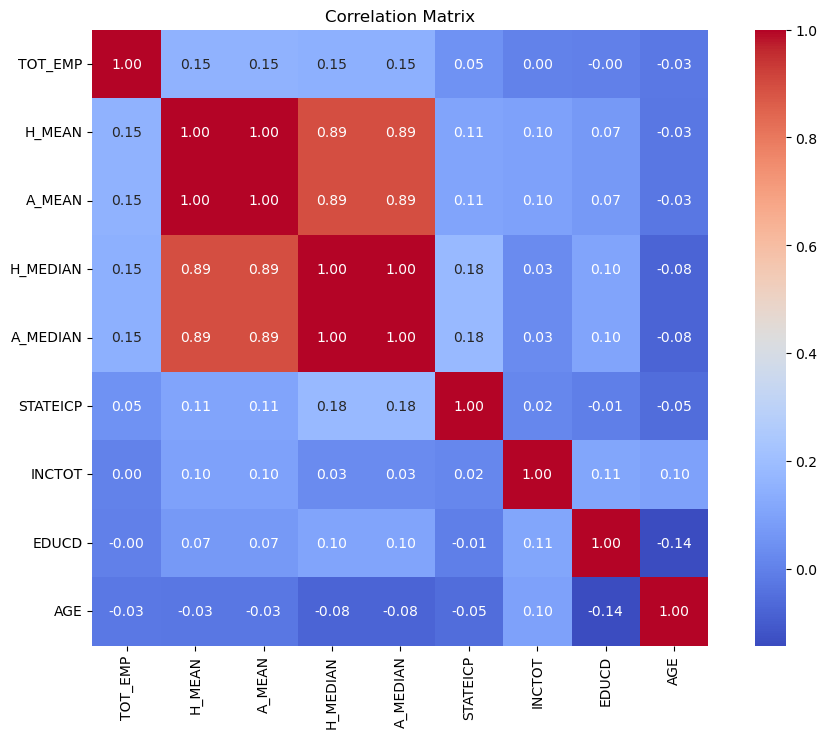

In [74]:
# Step 1: Identify non-numeric columns
non_numeric_columns = merged_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Step 2: Select only numeric columns for correlation
numeric_df = merged_df.select_dtypes(include=['number'])

# Step 3: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

- **Plot 2:** Scatter plot showing the relationship between A_MEAN and TOT_EMP.

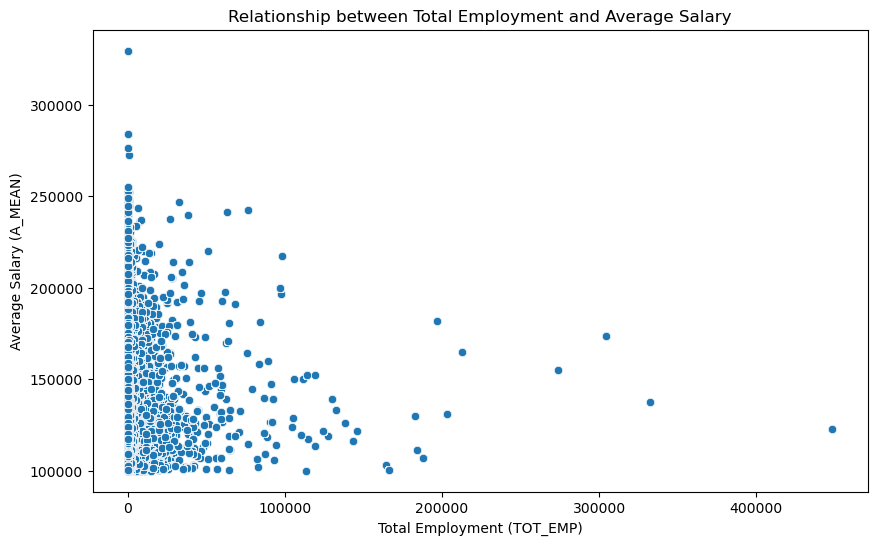

In [75]:
# Plot 2: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOT_EMP', y='A_MEAN', data=merged_df)
plt.title('Relationship between Total Employment and Average Salary')
plt.xlabel('Total Employment (TOT_EMP)')
plt.ylabel('Average Salary (A_MEAN)')
plt.show()

5. What is the distribution of high-paid individuals by gender?

- Plot 1: Count of High-Paid Individuals by Gender

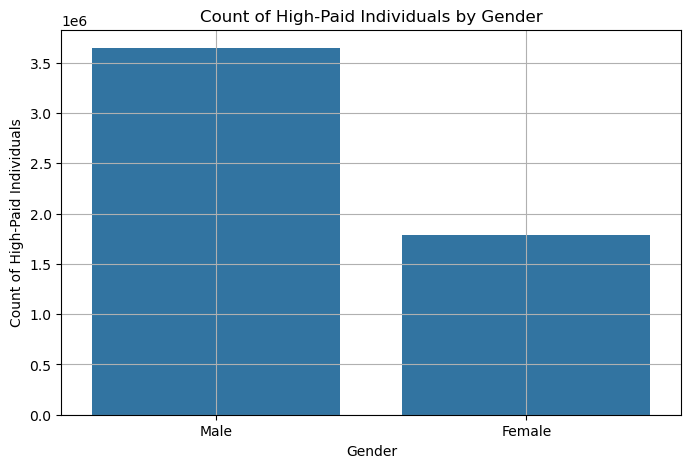

In [80]:
# Count of high-paid individuals by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='SEX', data=merged_df)
plt.title('Count of High-Paid Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of High-Paid Individuals')
plt.grid()
plt.show()

- Plot 2: Average Annual Mean Wage by Gender

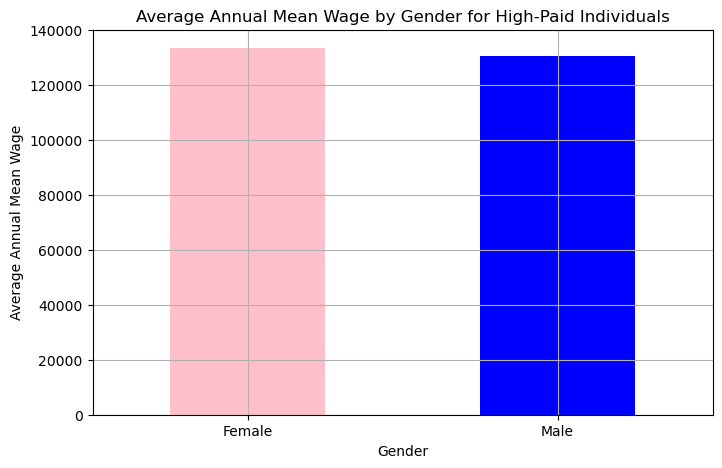

In [82]:
# Average Annual Mean Wage by Gender
avg_wages_by_gender = merged_df.groupby('SEX')['A_MEAN'].mean()

plt.figure(figsize=(8, 5))
avg_wages_by_gender.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Annual Mean Wage by Gender for High-Paid Individuals')
plt.xlabel('Gender')
plt.ylabel('Average Annual Mean Wage')
plt.xticks(rotation=0)
plt.grid()
plt.show()

6. How does the average salary vary across different industries?

In [86]:
# merged_df['NAICS_TITLE'].unique()
bls_clean['NAICS_TITLE'].unique()

array(['Cross-industry', 'Cross-industry, Private Ownership only',
       'Agriculture, Forestry, Fishing and Hunting',
       'Mining, Quarrying, and Oil and Gas Extraction', 'Utilities',
       'Construction', 'Wholesale Trade', 'Information',
       'Finance and Insurance', 'Real Estate and Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Management of Companies and Enterprises',
       'Administrative and Support and Waste Management and Remediation Services',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services (except Public Administration)',
       'Federal, State, and Local Government, excluding State and Local Government Schools and Hospitals and the U.S. Postal Service (OEWS Designation)',
       'Forestry and Logging', 'Logging',
       'Support Activities for Agriculture and Forestry',
       'Support Activities

In [109]:
census_df.head()

,STATEICP,OCC_CODE,INCTOT,EDUCD,SEX,AGE,PRIM_STATE,STATE_NAME,EDUCATION_LABEL
271,41,015124,128597,65,Male,61,AL,Alabama,Grade 1 to 4
277,41,151252,111084,101,Male,36,AL,Alabama,Grade 5 to 8
283,41,119151,459557,114,Male,66,AL,Alabama,Associate's degree
294,41,049904,153147,81,Male,58,AL,Alabama,Kindergarten
298,41,472111,122751,63,Male,50,AL,Alabama,No schooling


In [108]:
merged_df.head()

,AREA_TITLE,NAICS_TITLE,OCC_CODE,OCC_TITLE,TOT_EMP,PRIM_STATE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,LEVEL,STATEICP,INCTOT,EDUCD,SEX,AGE,STATE_NAME,EDUCATION_LABEL
0,Alabama,Cross-industry,111021,General And Operations Managers,34450.0,AL,62.17,129310.0,49.67,103320.0,State,41,105215,114,Male,29,Alabama,Associate's degree
1,Alabama,Cross-industry,111021,General And Operations Managers,34450.0,AL,62.17,129310.0,49.67,103320.0,State,41,125089,101,Male,32,Alabama,Grade 5 to 8
2,Alabama,Cross-industry,111021,General And Operations Managers,34450.0,AL,62.17,129310.0,49.67,103320.0,State,41,137949,71,Male,26,Alabama,Nursery to grade 4
3,Alabama,Cross-industry,111021,General And Operations Managers,34450.0,AL,62.17,129310.0,49.67,103320.0,State,41,123920,63,Male,29,Alabama,No schooling
4,Alabama,Cross-industry,111021,General And Operations Managers,34450.0,AL,62.17,129310.0,49.67,103320.0,State,41,140287,71,Male,39,Alabama,Nursery to grade 4


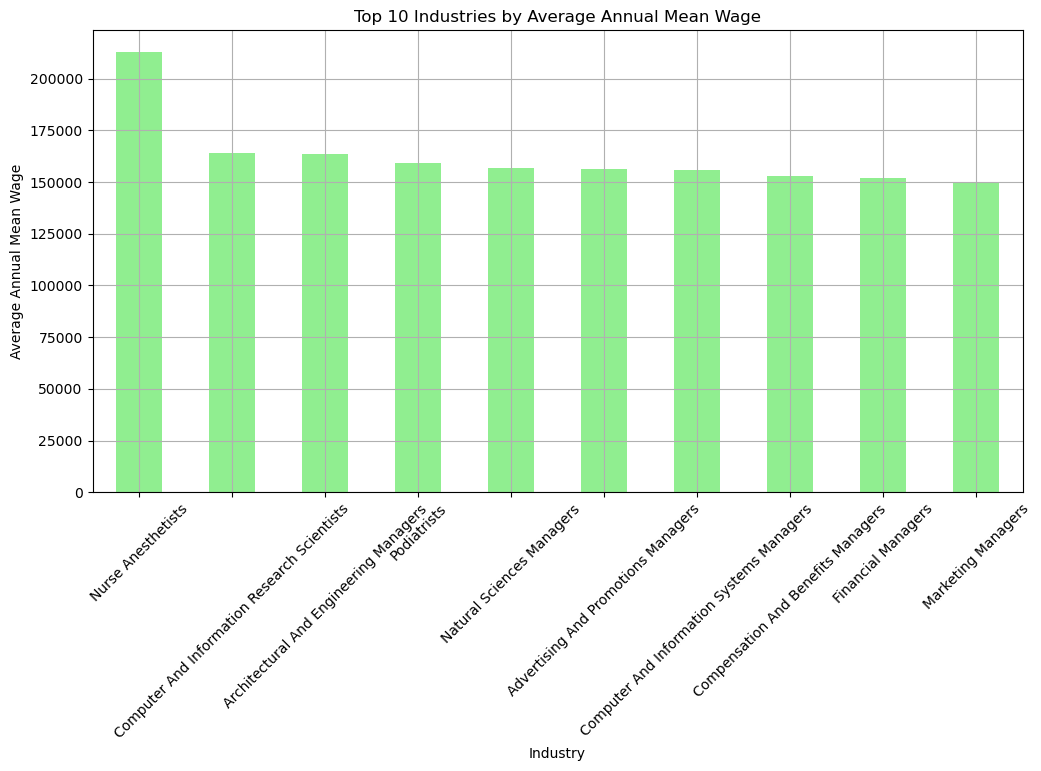

In [110]:
# Average Annual Mean Wage by Industry
avg_wages_by_industry = merged_df.groupby('OCC_TITLE')['A_MEAN'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_wages_by_industry.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Industries by Average Annual Mean Wage')
plt.xlabel('Industry')
plt.ylabel('Average Annual Mean Wage')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [112]:
merged_df['OCC_TITLE'].nunique()

162

C:\Users\marwa\AppData\Local\Temp\ipykernel_17264\2197158225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OCC_TITLE', y='A_MEAN', data=merged_df, palette='Set2')


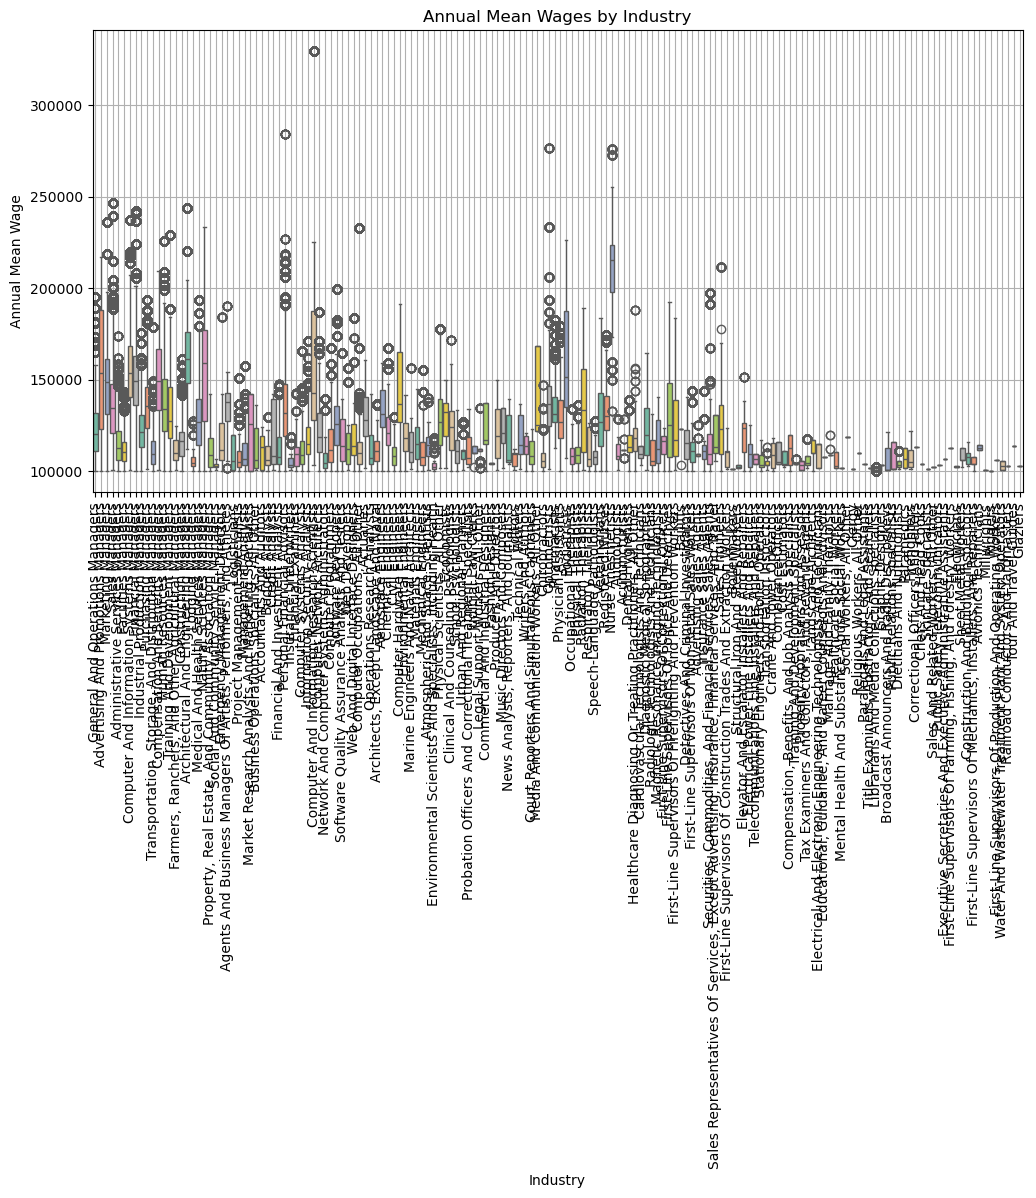

In [111]:
# Boxplot of Annual Mean Wages by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='OCC_TITLE', y='A_MEAN', data=merged_df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Annual Mean Wages by Industry')
plt.xlabel('Industry')
plt.ylabel('Annual Mean Wage')
plt.grid()
plt.show()

------------------------------------------------------